In [24]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Churn.csv')
dataset.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [25]:
#missing values
print(dataset.isnull().sum())
print(dataset.describe)

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
<bound method NDFrame.describe of      Customer ID  Gender  Senior Citizen Partner Dependents  tenure  \
0     7590-VHVEA  Female               0     Yes         No       1   
1     7590-VHVEG  Female               0     Yes         No       1   
2     5575-GNVDE    Male               0      No         No      34   
3     3668-QPYBK    Male               0      No         No       2   
4     7795-CFOCW    Male               0      No         No      45   
...          ...     ...             ...    

Churn
No     5175
Yes    1869
Name: count, dtype: int64


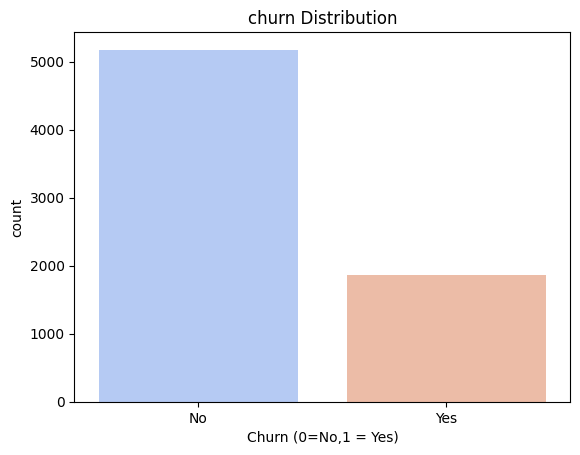

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
print(dataset['Churn'].value_counts())
sns.countplot(x='Churn',data=dataset,palette='coolwarm')
plt.title('churn Distribution')
plt.xlabel('Churn (0=No,1 = Yes)')
plt.ylabel('count')
plt.show()

In [27]:
dataset.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [28]:
#handling missing and incorrect data


dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')
dataset['Total Charges'].fillna(dataset['Total Charges'].median(),inplace=True)

In [29]:
dataset.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [30]:
#handling categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_columns =['Gender', 'Partner','Dependents', 'Phone Service', 'Multiple Lines',
                      'Internet Service', 'Online Security', 'Online Backup',
                      'Device Protection','Paperless Billing','Churn', 'Tech Support',
                      'Contract','Payment Method', 'Streaming TV','Streaming Movies'
                    ]
for column in categorical_columns:
    dataset[column] = labelencoder.fit_transform(dataset[column])
    

In [31]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['Churn', 'Customer ID'], axis=1)
y = dataset['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [34]:
#feature scaling
#model training
#ensemble learning
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
#decision tree
#clf stands for classifier

#variable to store the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
#random state is used to ensure reproducibility it makes sure that the results are the same every time you run the code
#n_estimators is the number of trees in the forest

#------PARAMETERS------
#n_estimators: The number of trees in the forest. More trees can lead to better performance but also increases computation time.
#max_depth: The maximum depth of the tree. Limiting the depth can help prevent overfitting.
#min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent overfitting.
#min_samples_leaf: The minimum number of samples required to be at a leaf node. Higher values can smooth the model.
#min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
#max_features: The number of features to consider when looking for the best split. Can be an integer, float, or string ('auto', 'sqrt', 'log2').
#bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
#oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.
#n_jobs: The number of jobs to run in parallel. -1 means using all processors.
#verbose: Controls the verbosity when fitting and predicting.
#warm_start: When set to True, it allows you to add more trees to the existing forest without starting from scratch.
#random_state: Controls the randomness of the estimator. Setting it ensures reproducibility of results.

clf.fit(X_train, y_train)
#predicting the test set results
y_pred = clf.predict(X_test) 
print(y_pred)



[0 0 1 ... 1 0 0]


In [ ]:
#to obtain the confusion matrix in a table format
from sklearn.metrics import confusion_matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(confusion_matrix_result,
                                    index=['Actual No Churn', 'Actual Churn'],
                                    columns=['Predicted No Churn', 'Predicted Churn'])
print(confusion_matrix_df)

                 Predicted No Churn  Predicted Churn
Actual No Churn                 922              103
Actual Churn                    203              181


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.4f}%')

Accuracy: 78.2825%


In [1]:
pip show flask


Name: Flask
Version: 3.1.1
Summary: A simple framework for building complex web applications.
Home-page: 
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: /home/keithunt_35/Desktop/yr2 recess/LearnPython/.venv/lib/python3.12/site-packages
Requires: blinker, click, itsdangerous, jinja2, markupsafe, werkzeug
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask
app = Flask(__name__) #flask constructor

#a decorator to tell Flask what URL is associated with the function
@app.route('/')
def home():
    return "Welcome to the Churn Prediction API!"

if __name__ == '__main__':
    app.run(debug=True) #debug=True will reload the server automatically when you make changes to the code
    
    *